### CUNY Data 620 - Web Analytics, Summer 2020
**Group Homework Assignment 6**  
**Prof:** Alain Ledon  
**Members:** Misha Kollontai, Amber Ferger, Zach Alexander, Subhalaxmi Rout  

**Youtube Link:** 

### Instructions

It can be useful to be able to classify new "test" documents using already classified "training" documents. <br>A common example is using a corpus of labeled spam and ham (non-spam) e-mails to predict whether or not a new document is spam. <br>Here is one example of such data: http://archive.ics.uci.edu/ml/datasets/Spambase

### Import Packages

In [83]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import csv
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Using the link mentioned above we will download 2 files i.e "spambase.data" and "spambase.names".<br> The spambase.data file contains various parameters for each file as well as a classificationof ham or spam (i.e 1 = spam, 0 = Not spam). The spambase.names file contains the descriptions of each of the features. We will extract these features from the file and apply them to the dataset to create models. 

In [34]:
# extract feature from spambase.names file.

# created an empty feature list
categories = []

# open file 
feature_file = open('data/spambase.names')
# remove '\n', split the text,  and match with word_freq|char_freq feature 
for line in feature_file:
    if not re.match(r'\|', line):
        line = line.rstrip()
        if re.search(r'(word_freq_|char_freq_|capital_run_length_).+', line):   
            words = line.split()
            first_word = words[0]
            categories.append(first_word[:-1])
#The list of features in the names file doesn't include the column definind spam/ham, so let's add one. 

categories.append('spam')
categories[:5]

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our']

Let's now load the data from the data file and apply our 'categories' list as the column header. 

In [38]:
data=pd.read_csv('data/spambase.data', header=None)
data.columns = categories

Let's take a look at our dataset ot see how much spam and how much ham we have. 

In [39]:
# Count spam and non-spam
count_spam = len(data[data.spam == 1])
count_nonspam = len(data[data.spam == 0])

print("Spam: %d" %count_spam)
print("Non-spam: %d" %count_nonspam)

Spam: 1813
Non-spam: 2788


In [41]:
data.head(4)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1


#### Data splitting:

This table consists of 58 columns, we will devide the dataset into 2 parts i.e the train and the test set. Train data is 75% of data and test data is 25% of data. We will create two variables: the output will be the 'spam' column, the input will be everything else. We also want to ensure that we stratify the model so that we have a representative breakdown of Spam and Ham. 

In [45]:
X = data.values[:, 0:57]
Y = data.values[:, 57]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 4, stratify=Y)

Parameter test_size is given value 0.25. It means test set will be 25% of the whole dataset and training set will be 75%. Parameter random_state is a pseudo-random number generator state used for random sampling.

#### Model 1: Support Vector machine

We will create model Support Vector machine algorithm and will create confusion matrix and the accuracy. 

In [61]:
svm_model = svm.SVC()
svm_model.fit(X_train, Y_train)

# Prediction
svm_pred = svm_model.predict(X_test)

In [58]:
# find accuracy on the Test Set
print(accuracy_score(Y_test, svm_pred))

0.7115551694178974


In [59]:
# Determine Performance Metrics

print(confusion_matrix(Y_test, svm_pred))

[[618  79]
 [253 201]]


Using a baseline support vector machine(SVM) the accuracy of predicting spam messages/emails is 71%.

#### Model 2: K Nearest Neighbors

When putting together a K-Nearest Neighbors model we wanted to ensure we were selecting the optimal number of neighbors for our dataset. To do so we looped through them and identified the number of neighbors that corresponded to the highest accuracy. 

In [80]:
n_neigh = range(1,11)
K_N_acc = []
for n in n_neigh:
    k_neigh = KNeighborsClassifier(n_neighbors = n)
    k_neigh.fit(X_train,Y_train)
    k_neigh_pred = k_neigh.predict(X_test)
    K_N_acc.append(accuracy_score(Y_test, k_neigh_pred))
K_N = {"n_neighbors":n_neigh,'Accuracy':K_N_acc}
K_N = pd.DataFrame(K_N)
K_N.head().style.hide_index()

n_neighbors,Accuracy
1,0.806255
2,0.786273
3,0.807993
4,0.790617
5,0.805387


By plotting these results we can find the best number of neightbors to use. From this set of data it seems to be 3. It's interesting to note that using even numbers seems to result in poorer accuracy across the board.

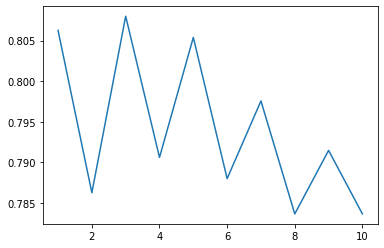

In [84]:
plt.plot(K_N['n_neighbors'],K_N['Accuracy'])

**Reference: ** 